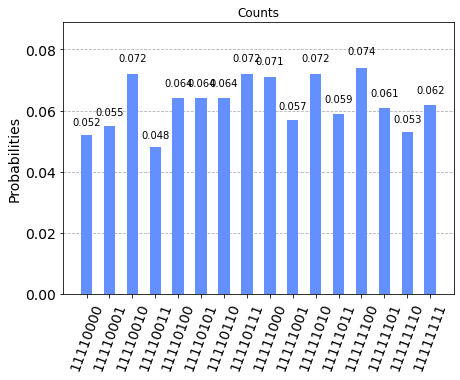

In [89]:
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import *
from math import *
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi


# Input parameters (a1,a2,b1,b2,w11,w12,w21,w22)
a =[0,0];
b =[0,0];

w = [0,0,0,0];

# Assigning qubit rotation angles using the above parameters

theta =[0,0];
gamma =[0,0];

theta[0] = 2*asin(sqrt(exp(a[0])/(exp(a[0]) + exp(-a[0]))));
theta[1] = 2*asin(sqrt(exp(a[1])/(exp(a[1]) + exp(-a[1]))));


gamma[0] = 2*asin(sqrt(exp(b[0])/(exp(b[0]) + exp(-b[0]))));
gamma[1] = 2*asin(sqrt(exp(b[1])/(exp(b[1]) + exp(-b[1]))));

THETA = [2*asin(sqrt(exp(w[0])/(exp(abs(w[0]))))), 2*asin(sqrt(exp(w[1])/(exp(abs(w[1]))))),2*asin(sqrt(exp(w[2])/(exp(abs(w[2]))))),2*asin(sqrt(exp(w[3])/(exp(abs(w[3])))))];

THETAN = [2*asin(sqrt(exp(-w[0])/(exp(abs(w[0]))))), 2*asin(sqrt(exp(-w[1])/(exp(abs(w[1]))))),2*asin(sqrt(exp(-w[2])/(exp(abs(w[2]))))),2*asin(sqrt(exp(-w[3])/(exp(abs(w[3])))))];


#initialising ccry gate 0
qreg = QuantumRegister(3, 'q')
ccry = QuantumCircuit(qreg)

ccry.cry(THETA[0] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(-THETA[0] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(THETA[0] / 2, qreg[0], qreg[2])

ccry.x(0)

ccry.cry(THETAN[0] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(-THETAN[0] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(THETAN[0] / 2, qreg[0], qreg[2])

ccry.x(0)
ccry.x(1)


ccry.cry(THETAN[0] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(-THETAN[0] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(THETAN[0] / 2, qreg[0], qreg[2])

ccry.x(0)

ccry.cry(THETA[0] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(-THETA[0] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(THETA[0] / 2, qreg[0], qreg[2])

CCRY0 = ccry.to_instruction()

#initialising ccry gate 1
qreg = QuantumRegister(3, 'q')
ccry = QuantumCircuit(qreg)

ccry.cry(THETA[1] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(-THETA[1] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(THETA[1] / 2, qreg[0], qreg[2])

ccry.x(0)

ccry.cry(THETAN[1] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(-THETAN[1] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(THETAN[1] / 2, qreg[0], qreg[2])

ccry.x(0)
ccry.x(1)


ccry.cry(THETAN[1] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(-THETAN[1] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(THETAN[1] / 2, qreg[0], qreg[2])

ccry.x(0)

ccry.cry(THETA[1] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(-THETA[1] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(THETA[1] / 2, qreg[0], qreg[2])

CCRY1 = ccry.to_instruction()

#initialising ccry gate 2
qreg = QuantumRegister(3, 'q')
ccry = QuantumCircuit(qreg)

ccry.cry(THETA[2] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(-THETA[2] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(THETA[2] / 2, qreg[0], qreg[2])

ccry.x(0)

ccry.cry(THETAN[2] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(-THETAN[2] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(THETAN[2] / 2, qreg[0], qreg[2])

ccry.x(0)
ccry.x(1)


ccry.cry(THETAN[2] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(-THETAN[2] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(THETAN[2] / 2, qreg[0], qreg[2])

ccry.x(0)

ccry.cry(THETA[2] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(-THETA[2] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(THETA[2] / 2, qreg[0], qreg[2])

CCRY2 = ccry.to_instruction()

#initialising ccry gate 3
qreg = QuantumRegister(3, 'q')
ccry = QuantumCircuit(qreg)

ccry.cry(THETA[3] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(-THETA[3] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(THETA[3] / 2, qreg[0], qreg[2])

ccry.x(0)

ccry.cry(THETAN[3] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(-THETAN[3] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(THETAN[3] / 2, qreg[0], qreg[2])

ccry.x(0)
ccry.x(1)


ccry.cry(THETAN[3] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(-THETAN[3] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(THETAN[3] / 2, qreg[0], qreg[2])

ccry.x(0)

ccry.cry(THETA[3] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(-THETA[3] / 2, qreg[1], qreg[2])
ccry.cx(qreg[0], qreg[1])
ccry.cry(THETA[3] / 2, qreg[0], qreg[2])

CCRY3 = ccry.to_instruction()

# The actual circuit(4 visible units + 4 hidden units)
qreg_q = QuantumRegister(8, 'q')
creg_c = ClassicalRegister(8, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.ry(theta[0], qreg_q[0])
circuit.ry(theta[1], qreg_q[1])
circuit.ry(gamma[0], qreg_q[2])
circuit.ry(gamma[1], qreg_q[3])

# Circuit barrier

circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[2])
circuit.barrier(qreg_q[3])
circuit.barrier(qreg_q[4])
circuit.barrier(qreg_q[5])
circuit.barrier(qreg_q[6])
circuit.barrier(qreg_q[7])

#Appending ccry gates (update it after talking to Manas

circuit.append(CCRY0, [0,2,4]);
circuit.append(CCRY1, [0,3,5]);
circuit.append(CCRY2, [1,2,6]);
circuit.append(CCRY3, [1,3,7]);

# Measurements
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])
circuit.measure(qreg_q[5], creg_c[5])
circuit.measure(qreg_q[6], creg_c[6])
circuit.measure(qreg_q[7], creg_c[7])


# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circuit, simulator)

# Run and get counts
num_of_shots = 1000;
result = simulator.run(circ, shots=num_of_shots).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Counts')


In [90]:
counts

{'11111011': 59,
 '11110010': 72,
 '11111101': 61,
 '11110110': 64,
 '11111100': 74,
 '11110111': 72,
 '11111001': 57,
 '11110001': 55,
 '11111110': 53,
 '11110101': 64,
 '11110000': 52,
 '11111111': 62,
 '11111010': 72,
 '11110100': 64,
 '11111000': 71,
 '11110011': 48}

In [91]:
P = {'00':0,'01':0,'10':0,'11':0}


In [92]:
for i in P:
    for j in counts:
        if (j[0:4] == '1111' and j[6:8] == i):
            P[i] = P[i] + counts[j]/num_of_shots;
            

In [93]:
P

{'00': 0.261, '01': 0.237, '10': 0.261, '11': 0.241}